Imports

In [29]:
import random
import networkx as nx
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

Parameter setting

In [52]:
N = 10000000 # Total population, N.
I0, R0 = 1, 0 # Initial number of infected and recovered individuals in time 0
S0 = N - I0 - R0 # Everyone else is susceptible to infection in time 0
beta, gamma = 0.35, 1./10 # Contact rate and mean recovery rate, gamma
t = np.linspace(0, 161, 160) # A grid of time points (in days)

The differential SIR equations

In [53]:
def der(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [54]:
y0 = S0, I0, R0 # Vector of initial conditions
ret = odeint(der, y0, t, args=(N, beta, gamma)) # Integrate the SIR equations over the time grid
S, I, R = ret.T

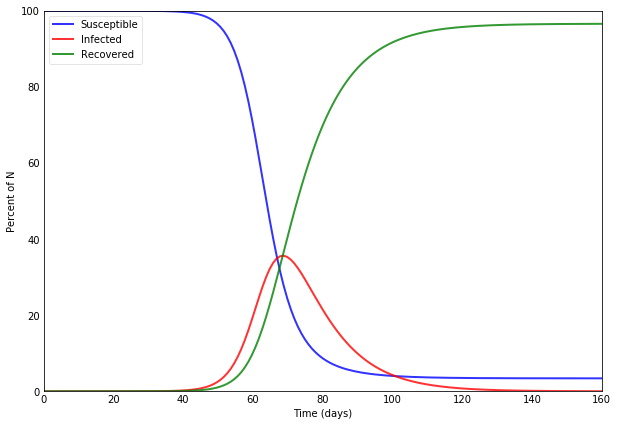

In [58]:
# Plot the data
fig = plt.figure(facecolor='w',figsize=(10,7))
ax = fig.add_subplot(111,axisbelow=True)
ax.plot(t, S/100000, 'b', alpha=0.8, lw=2, label='Susceptible')
ax.plot(t, I/100000, 'r', alpha=0.8, lw=2, label='Infected')
ax.plot(t, R/100000, 'g', alpha=0.8, lw=2, label='Recovered')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Percent of N')
ax.set_xlim(0,160)
ax.set_ylim(0,100)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)